In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os
!pip install kagglehub
!pip install kagglehub[pandas-datasets]

%matplotlib inline 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Usuario\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [6]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

# Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:
- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?
2. Visualizations:
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
df.shape

(2443651, 9)

In [9]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [10]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [11]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [12]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [13]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [14]:
top5 = df['category'].value_counts().head(5)
top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [15]:
df['category'].value_counts().nunique()

246

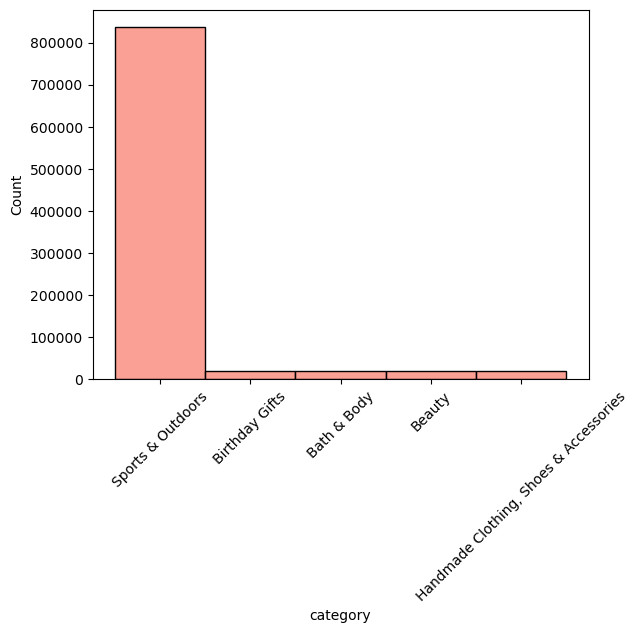

In [16]:
top5_cats = df['category'].value_counts().head(5).index
df_top5 = df[df['category'].isin(top5_cats)]

sns.histplot(data=df_top5, x='category', color="salmon", kde=False)
plt.xticks(rotation=45)
plt.show()

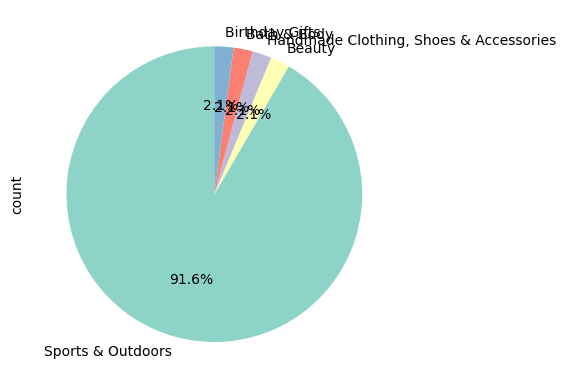

In [17]:
df_top5['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

# Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:
- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?
2. Measures of Dispersion:
- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?
3. Visualizations:
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [18]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para quitar la notación científica
print(df['price'].describe())

pd.reset_option('display.float_format') # Volver a activar la notación científica

count   2443651.00
mean         89.24
std         345.61
min           0.00
25%           9.99
50%          19.09
75%          45.99
max      100000.00
Name: price, dtype: float64


In [19]:
mode = df['price'].mode()[0]
variance = df['price'].var()
price_range = df['price'].max() - df['price'].min()
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25) # rango intercuartil (IQR)

print(f"""Mode: {mode},
Variance: {variance},
Range: {price_range},
IQR: {iqr}
""")
print("""
- El precio promedio es 89,24. Comparándolo con la moda, vemos que hay mucha diferencia.
- 9.99 es el valor que más se repite (mode), y la mediana (es el valor que sale en el 50%) es 19.09, también muy alejada de la media.
- La std y la varianza es bastante alta, confirma que los precios están muy dispersos
- La std de 345.61 significa que los precios suelen desviarse en promedio ese valor de la media
- El rango (valor max - min) al ser enorme, significa que hay muchos valores extremos o outliers
- El IQR es 36 (3rQuartil - 1rQuartil, es decir la distnacia entre Q1 y Q3, que contiene el 50% central de los datos)
- Significa que vemos un número sin que los outliers afecten el resultado
- CONCLUSIÓN: mucha variedad de precios, la mayoría son baratos pero hay algunos muy caros
      """)

Mode: 9.99,
Variance: 119445.48532256528,
Range: 100000.0,
IQR: 36.0


- El precio promedio es 89,24. Comparándolo con la moda, vemos que hay mucha diferencia.
- 9.99 es el valor que más se repite (mode), y la mediana (es el valor que sale en el 50%) es 19.09, también muy alejada de la media.
- La std y la varianza es bastante alta, confirma que los precios están muy dispersos
- La std de 345.61 significa que los precios suelen desviarse en promedio ese valor de la media
- El rango (valor max - min) al ser enorme, significa que hay muchos valores extremos o outliers
- El IQR es 36 (3rQuartil - 1rQuartil, es decir la distnacia entre Q1 y Q3, que contiene el 50% central de los datos)
- Significa que vemos un número sin que los outliers afecten el resultado
- CONCLUSIÓN: mucha variedad de precios, la mayoría son baratos pero hay algunos muy caros
      


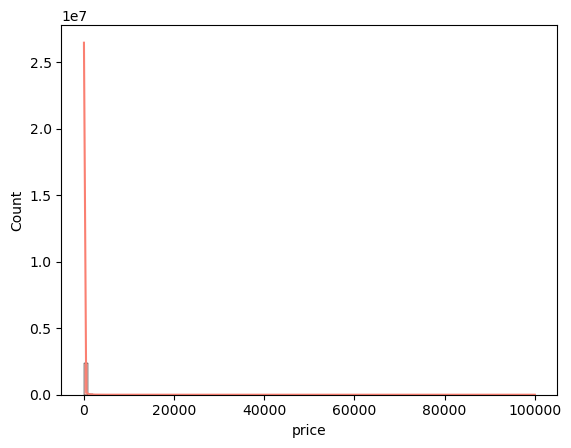

In [20]:
sns.histplot(df['price'], kde=True, bins=100, color="salmon")
plt.show()

- La mayoría de productos se concentran en un rango de precios bajo, entre 0-100 aproximadamente
- El gráfico no sirve por los outliers
- Podríamos centrarnos en mostrar un rango del 0 al 100 o excluir subconjuntos
- Eliminar la notación científica

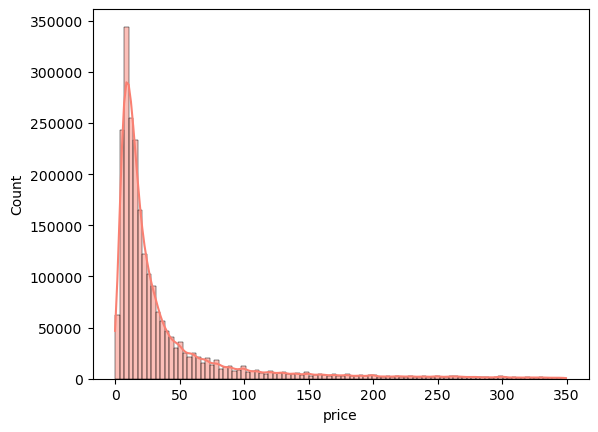

In [21]:
df_new = df[df['price'] < 349.5]
sns.histplot(df_new['price'], kde=True, bins=100, color="salmon")
plt.ticklabel_format(style='plain', axis='y') # Eliminamos la notación científica
pd.reset_option('display.float_format') # Volver a activar la notación científica
plt.show()

In [22]:
quantile = df['price'].quantile(0.95)
quantile

349.5

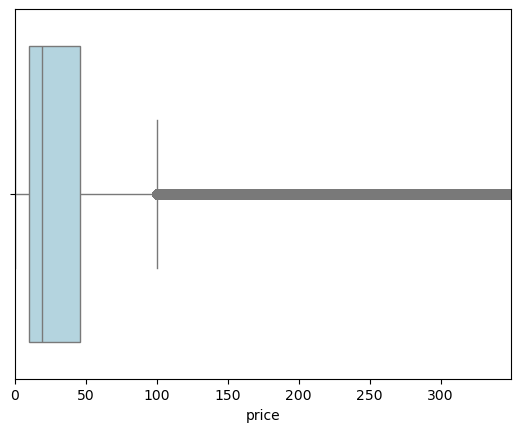

In [23]:
sns.boxplot(x=df['price'], color="lightblue")
plt.xlim(0, 349.5)
plt.show()

1. Box plot
- El borde de la izquierda de la caja es el primer cuartil (Q1), es decir, el valor por debajo del cual están el 25 % de las casas.
- El borde de la derecha es el tercer cuartil (Q3), el valor por debajo del cual están el 75 % de las casas.
- La distancia entre Q1 y Q3 se llama IQR (rango intercuartílico) y muestra dónde está concentrada la mitad central de los datos.
2. La línea dentro de la caja
- Es la mediana (Q2), el valor “del medio” cuando ordenamos todas las casas de menos a más habitaciones.
3. Whiskers
- No hay
4. Los puntos sueltos
- Son los outliers, valores “atípicos” que quedan fuera de los whiskers. Al estar limitado de 0 a 100, no salen.

# Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:
- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?
2. Measures of Dispersion:
- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?
3. Shape of the Distribution:
- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?
4. Visualizations:
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para quitar la notación científica
print(df['stars'].describe())

pd.reset_option('display.float_format') # Volver a activar la notación científica

count   2443651.00
mean          2.15
std           2.19
min           0.00
25%           0.00
50%           0.00
75%           4.40
max           5.00
Name: stars, dtype: float64


In [25]:
mode = df['stars'].mode()[0]
variance = df['stars'].var()
price_range = df['stars'].max() - df['stars'].min()
iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25) # rango intercuartil (IQR)

print(f"""Mode: {mode},
Variance: {variance},
Range: {price_range},
IQR: {iqr}
""")
print("""
- La media es baja
- La mediana y la moda es 0 porque muchos productos no tienen calificación
- La varianza es 4.82, significa que hay gran dispersión en las calificaciones
- La std también es bastante alta, significa que las calificaciones suelen desviarse en promedio ese valor de la media
- El Rango es 5, lo que significa que las calificaciones abarcan todo el rango
- El Rango Intercuartil (IQR) indica que la mayoría de calificaciones se agrupan entre 0 y 4.4
""")

Mode: 0.0,
Variance: 4.81743402976196,
Range: 5.0,
IQR: 4.4


- La media es baja
- La mediana y la moda es 0 porque muchos productos no tienen calificación
- La varianza es 4.82, significa que hay gran dispersión en las calificaciones
- La std también es bastante alta, significa que las calificaciones suelen desviarse en promedio ese valor de la media
- El Rango es 5, lo que significa que las calificaciones abarcan todo el rango
- El Rango Intercuartil (IQR) indica que la mayoría de calificaciones se agrupan entre 0 y 4.4



In [26]:
skewnes_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()
print(skewnes_rating , kurtosis_rating )

0.08120735761080985 -1.9260061280432985


- Tienden a valores más altos

In [27]:
df['stars'].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

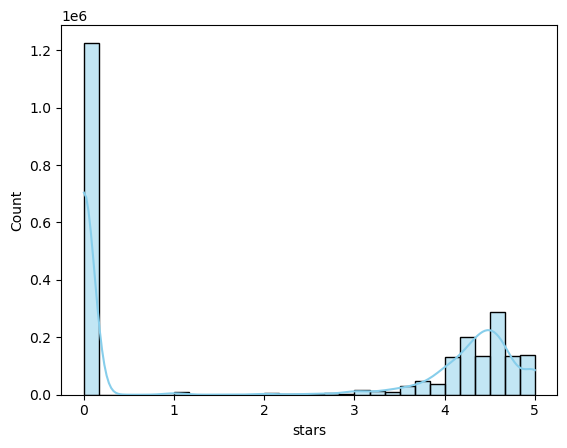

In [28]:
sns.histplot(df['stars'], kde=True, bins=30, color="skyblue")
plt.show()

In [29]:
percentage_zeros = (df['stars'].value_counts().get(0, 0) / len(df)) * 100
percentage_zeros

50.15613931776674

- La mitad no tienen calificación y el resto, se concentran mucho entre 3 y 5